# 1. Classification

In [2]:
# Import modules
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
digits = datasets.load_digits()

In [3]:
# Create data and label arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

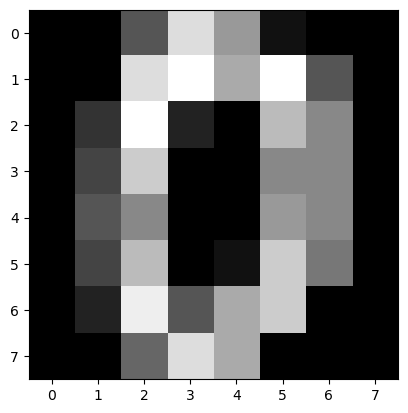

In [4]:
plt.imshow(X[0].reshape((8, 8)), cmap='gray')

# KNN

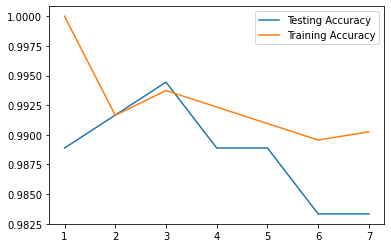

In [11]:
#kNN Classifier
number_neighbors = []
testing_scores = []
training_scores = []

# For loop: we loop 8 times as the number of neighbours:

for in range(1,8):
    kNN = KNeighborsClassifier(n_neighbors = i)
    kNN.fit(X_train, y_train)
    number_neighbors.append(...)
    training_scores.append(kNN.score(...))
    testing_scores.append(kNN.score(...))
    
plt.plot(number_neighbors, testing_scores, label="Testing Accuracy")
plt.plot(number_neighbors, training_scores, label="Training Accuracy")
plt.legend()

In this case, K = 2 looks best

# Kernels

In [6]:
# SVM/SVC Classifier
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm = SVC(kernel = 'linear')
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(kernel)
    print(classification_report(y_test, y_pred))

linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.95      1.00      0.98        42
           2       0.97      1.00      0.98        30
           3       0.97      1.00      0.99        35
           4       1.00      1.00      1.00        32
           5       0.93      1.00      0.96        27
           6       1.00      0.97      0.98        32
           7       1.00      1.00      1.00        48
           8       1.00      0.95      0.97        37
           9       1.00      0.92      0.96        39

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

poly
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.95      1.00      0.98        42
           2       0.97      1.00      0.98        30
           3

The linear and poly kernals look the best

# Naive Bayes

Text(50.722222222222214, 0.5, 'True label')

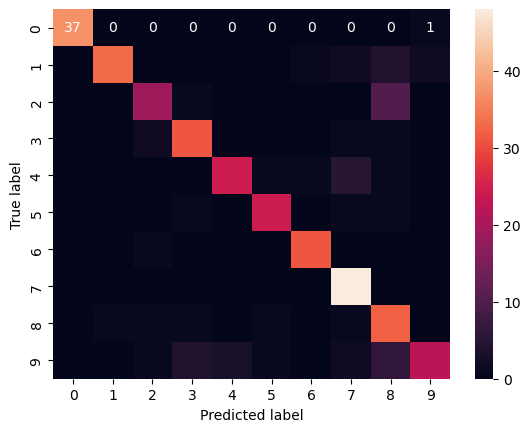

In [8]:
# Naive Bayes
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_matrix, annot = True)
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

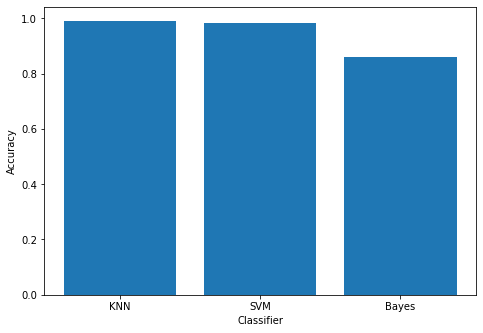

In [14]:
# Compare the accuracy of different classifiers in the same plot.
scores = [kNN, svm, bayes]
labels = ["KNN", "SVM", "Bayes"]
classifiers = [
    KNeighborsClassifier(kNN),
    SVC(svm),
    GaussianNB(bayes)
]

# for each classifier in the list of above classifier
for i in i:
    classifier.fit()
    scores.append(classifier.score(...))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,scores)
ax.set_xlabel("Classifier")
ax.set_ylabel("Accuracy")
plt.show()

# 2. Regression

In [9]:
# Load gapminder
df = pd.read_csv("gapminder.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


<AxesSubplot:>

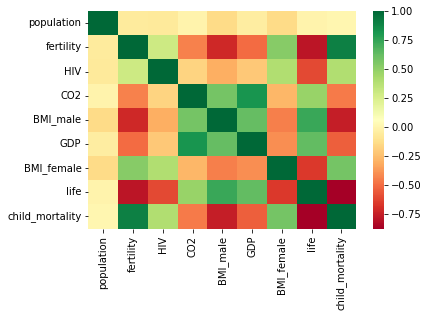

In [17]:
# Heatmap
sns.heatmap(...)

In [23]:
# Linear Regression
x = df["fertility"]
y = df["life"]

regression = LinearRegression()
regression.fit(x[:, None], y)
print(regression.score(x[:, None], y))

fig, ax = plt.plot(x,y, 'bo', x, regression.predict(x[:, None]), '-k')
plt.xlabel("Fertility")
plt.ylabel("Life Expectency")


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

In [25]:
# Linear regression on all
X = df[["fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "child_mortality"]]
y = df["life"]

regression_all = LinearRegression()
regression_all.fit(x,y)
print(regression_all.score(x,y))

ValueError: Expected 2D array, got 1D array instead:
array=[2.73 6.43 2.24 1.4  1.96 1.41 1.99 1.89 2.38 1.83 1.42 1.82 2.91 5.27
 2.51 3.48 2.86 1.9  1.43 6.04 6.48 3.05 5.17 1.68 6.81 1.89 2.43 5.05
 5.1  1.91 4.91 1.43 1.5  1.89 3.76 2.73 2.95 2.32 5.31 5.16 1.62 2.74
 1.85 1.97 4.28 5.8  1.79 1.37 4.19 1.46 4.12 5.34 5.25 2.74 3.5  3.27
 1.33 2.12 2.64 2.48 1.88 2.   2.92 1.39 2.39 1.34 2.51 4.76 1.5  1.57
 3.34 5.19 1.42 1.63 4.79 5.78 2.05 2.38 6.82 1.38 4.94 1.58 2.35 1.49
 2.37 2.44 5.54 2.05 2.9  1.77 2.12 2.72 7.59 6.02 1.96 2.89 3.58 2.61
 4.07 3.06 2.58 3.26 1.33 1.36 2.2  1.34 1.49 5.06 5.11 1.41 5.13 1.28
 1.31 1.43 7.06 2.54 1.42 2.32 4.79 2.41 3.7  1.92 1.47 3.7  5.54 1.48
 4.88 1.8  2.04 2.15 6.34 1.38 1.87 2.07 2.11 2.46 1.86 5.88 3.85].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [27]:
# Cross validation score
print(cross_val_score(regression, x[:, None], y, cv = 5))
print(cross_val_score(regression, x[:, None], y, cv = 5))

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

# Logistic Regression

In [28]:
# Load creditcard
df = pd.read_csv("creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


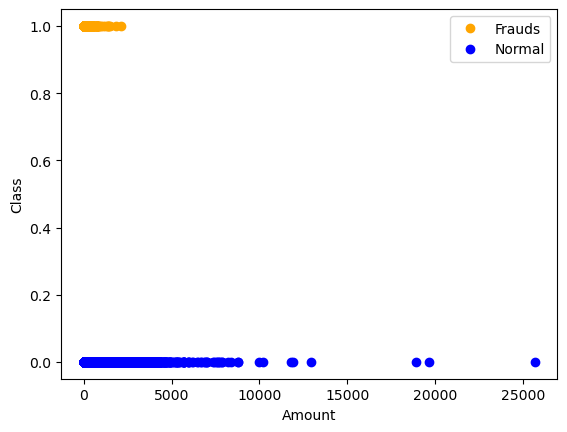

In [29]:
# Class and amount comparison
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
plt.plot(frauds.Amount, frauds.Class, 'o', color="orange", label="Frauds")
plt.plot(non_frauds.Amount, non_frauds.Class, 'bo', label="Normal")
plt.xlabel("Amount")
plt.ylabel("Class")
plt.legend()

All the fraud cases occur at low amounts

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(50.722222222222214, 0.5, 'True label')

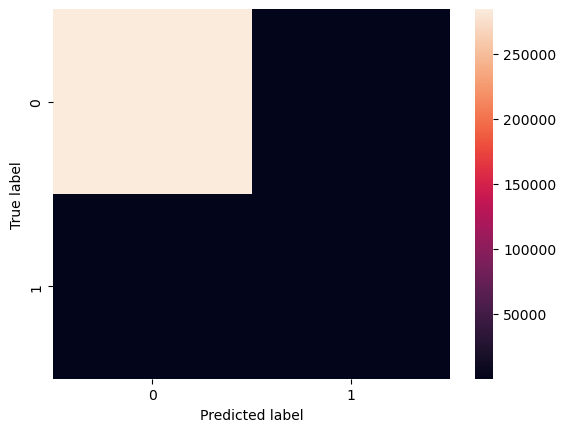

In [30]:
# Logistic Regression
X = df.drop("Class", axis=1)
y = df.Class

log_regression = LogisticRegression()
log_regression.fit(X, y)
y_pred = log_regression.predict(X)
conf_matrix = confusion_matrix(y, y_pred)

ax = sns.heatmap(conf_matrix)
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")